In [2]:
%matplotlib inline

from pathlib import Path

import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 19.1 네트워크 분석

## a

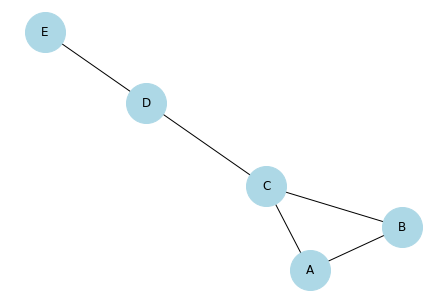

In [3]:
# 다섯개의 노드와 그것들을 연결하는 선으로 구성된 네트워크 형성
df = pd.DataFrame([
    ("A", "B"), ("A", "C"), ("B", "C"),
    ("C", "D"), ("D", "E")], columns=['from', 'to'])

G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# 무방향, 즉 방향성이 없는 그래프 그리기
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

## b

#### 클릭 
네트워크 구조의 일종으로 각각의 노드가 다른 모든 노드에 연결된 경우를 의미함.
연결은 하나 이상의 노드를 거치지 않고 직접 연결되어야 함.

d, e 제거

## c

##### 연결도 

특정노드가 보유하고 있는 연결선의 개수

In [4]:
print(G.degree())

[('A', 2), ('B', 2), ('C', 3), ('D', 2), ('E', 1)]


2

## d

In [5]:
print(G.degree())

[('A', 2), ('B', 2), ('C', 3), ('D', 2), ('E', 1)]


E, 하나의 연결 보유 

## e

In [6]:
# 연결도 분포를 표로 나타내기 -> 네트워크 측정측도 확인

In [7]:
degreeCount = collections.Counter(d for node, d in G.degree())
degreeDistribution = [0] * (1 + max(degreeCount))
for degree, count in degreeCount.items():
    degreeDistribution[degree] = count
degreeDistribution

[0, 1, 3, 1]

In [8]:
network_1 = pd.DataFrame({"Degree":["degree0", "degree1", "degree2", "degree3"],
                         "Frequency":degreeDistribution})
network_1

,Degree,Frequency
0,degree0,0
1,degree1,1
2,degree2,3
3,degree3,1


## f

네트워크가 연결되었다는 것은 모든 노드 간 경로가 존재한다는 의미

본 네트워크는 모두 연결되어 있다.

## g

In [9]:
# the betweenness centrality for nodes A and C

In [10]:
print(nx.betweenness_centrality(G))

{'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.5, 'E': 0.0}


## h

위의 문제는 무방향 네트워크

e/10

In [11]:
nx.density(G)

0.5

# 19.2 네트워크의 밀도와 크기

## a

기존 5개 노드에 2개 추가이기에 0.4 증가

## b

최단 경로 

공통된 이웃의 개수 

연결된 가중치 로 확인?

## c

## d

## e

In [16]:

dF = pd.DataFrame([("F", "B"), ("F", "D"), ("F", "C"), ("G", "A"), ("G", "D")], columns=["from", "to"])
df1 = pd.concat([df, dF], axis=0)
df1


,from,to
0,A,B
1,A,C
2,A,D
3,B,F
4,C,E
5,D,E
6,E,G
0,F,B
1,F,D
2,F,C


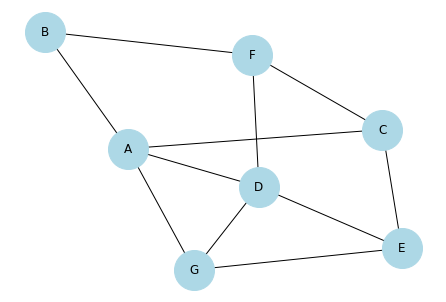

In [17]:
G = nx.from_pandas_edgelist(df1, "from", "to")
nx.draw(G, with_labels=True, node_color="lightblue", node_size=1600)
plt.show()

In [19]:
degreeCount1 = collections.Counter(d for node, d in G.degree())
degreeDistribution1 = [0]* (1+max(degreeCount1))

for degree, count in degreeCount1.items():
    degreeDistribution1[degree] = count
    
degreeDistribution_df1 = pd.DataFrame({'Degree':["degree0", "degree1", "degree2", "degree3", "degree4"],
 "Frequency": degreeDistribution1})

degreeDistribution_df1

,Degree,Frequency
0,degree0,0
1,degree1,0
2,degree2,1
3,degree3,4
4,degree4,2


# 19.3 연결선 예측

In [13]:
df = pd.DataFrame([("A", "B"), ("A", "C"), ("A", "D"), ("B", "F"),
 ('C', "E"), ("D", "E"), ("E", "G")], columns=["from", "to"])
df

,from,to
0,A,B
1,A,C
2,A,D
3,B,F
4,C,E
5,D,E
6,E,G


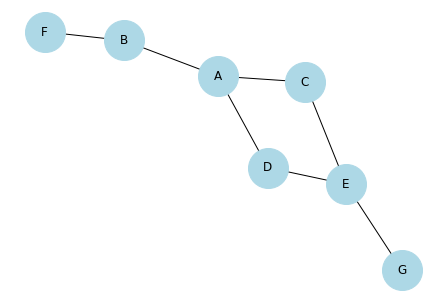

In [14]:
G = nx.from_pandas_edgelist(df, "from", "to")
nx.draw(G, with_labels=True, node_color="lightblue", node_size=1600)
plt.show()

## a

In [15]:
neighbors_score = nx.common_neighbor_centrality(G , ebunch=None, alpha=0.8)

for u, v, p in neighbors_score: 
    print("pair %s - %s : %f" %(u, v, p))

pair D - B : 1.500000
pair D - G : 1.500000
pair D - C : 2.300000
pair D - F : 0.466667
pair B - C : 1.500000
pair B - E : 0.466667
pair B - G : 0.350000
pair C - G : 1.500000
pair C - F : 0.466667
pair E - A : 2.300000
pair E - F : 0.350000
pair G - A : 0.466667
pair G - F : 0.280000
pair F - A : 1.500000
